# GRAPH and SESSION



## IMPORTS

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

## GRAPH
You can represent your dataflow of your computations in a __graph__.

<img src="files/files/graph.gif">

Each __node__ in your graph is called __op__ (short for operation).

An __op__ takes zero or more __Tensors__, performs some computation, and produces zero or more __Tensors__.

__Tensor__ is a typed multi-dimensional array. For example, you can represent a mini-batch of images as a 4-D array of floating point numbers with dimensions [batch, height, width, channels].

let's make a graph to do an aritmatic with tensorflow.
we will create two constants. and we will add them...

_c = a + b_




In [2]:
# create constants
a = tf.constant(2)
b = tf.constant(3)

# add two constants
c = tf.add(a,b)
print(a+b)
print(c)

Tensor("add:0", shape=(), dtype=int32)
Tensor("Add:0", shape=(), dtype=int32)


## Session
when we declare constants, variables, etc. they are tensors.
that's why they call it tensorflow. The data that we declare flows in a graph.
in order to execute the graph we have to run a __session__.
To compute anything, a graph must be launched in a __Session__. A __Session__ places the __graph__ ops onto Devices, such as CPUs or GPUs, and provides methods to execute them.





In [3]:
# launch the graph in a session
with tf.Session() as sess:
	print(sess.run(c))

5


## CONSTANT
we saw that we can delcared __constants__ and ran it...
__Constants__, as it speaks for itself, are used as constant value tensors.
To change the value we can use variables or placeholders.



In [4]:
# create graph
a = tf.constant(2)
b = tf.constant(3)
c = a+b
# launch the graph in a session
with tf.Session() as sess:
	print(sess.run(c))

5


## VARIABLE
Variables are tensors that we can change their value.
They are usually used for weights and biases.

BUT, what is the difference in execution then?


Variables needs to be __initialized__.
We have to invoke a __variable initializer operation__ and run the operation on the session.





In [5]:
# create graph
a = tf.Variable(2)
b = tf.Variable(3)
c = a+b
# add an Op to initialize global variables
init_op = tf.global_variables_initializer()

# launch the graph in a session
with tf.Session() as sess:
    # run the variable initializer
    sess.run(init_op)
    # now we can run our operations
    print(sess.run(c))

5


## PLACEHOLDER:
Placeholders are tensors that are placed to hold the data.
We can build our graph without needing the data (because data is huge).
In the time of need, we can feed the data in the right place (guess what place ?!!)

BUT, Placeholders are just holding the place... where should we feed the input?

In a dictionaty called __feed_dict__.





In [6]:
# create graph
# create a placeholder of type float 32-bit, value is a vector of 3 elements
a = tf.placeholder(tf.float32, shape=[3])
# create a constant of type float 32-bit, value is a vector of 3 elements
b = tf.constant([5, 5, 5], tf.float32)
c = a+b

# launch the graph in a session
with tf.Session() as sess:
    # create a feed_dict:
    feed_dict={a: [1, 2, 3]}
    # feed it to placeholder a via the dict 
    print(sess.run(c, feed_dict=feed_dict)) 

[ 6.  7.  8.]


## Exercise:
ok. now let's see a cool example. We will load an image and slice a part of the image and visualize it.

We will load an image and try to slice it using the _slice_ method in tensorflow. Complete the code to run the session.
Complete the code and 


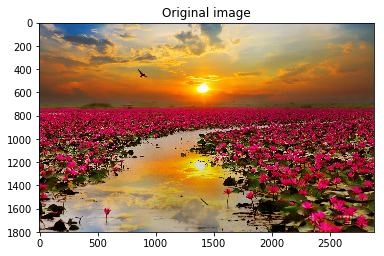

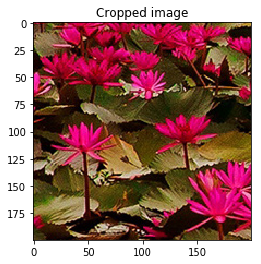

In [12]:
# load the image
filename = 'flowers.jpg'
raw_image_data = mpimg.imread(filename)

# create a placeholder for the image
image = tf.placeholder(dtype="uint8", shape=[None, None, 3])
# slice the image 
slice = tf.slice(image, begin=[1000, 0, 0], size=[200, 200, -1])

# launch the graph in a session
result = []
with tf.Session() as session:
    ######################## YOUR CODE HERE ##########################
    # Hint: You should run the session and pass the op that you want # 
    # and the feed_dict and store the value in "result" variable.    #
    #                                                                #
    result = session.run(slice, feed_dict={image: raw_image_data})
    #                                                                #    
    ##################################################################


    result = session.run(slice, feed_dict={image: raw_image_data})

plt.imshow(raw_image_data)
plt.title('Original image')
plt.show()

plt.imshow(result)
plt.title('Cropped image')
plt.show()